<a href="https://colab.research.google.com/github/mneedham/data-science-training/blob/master/02_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In this notebook we're going to explore the citation dataset that we we imported in the previous notebook. As with the previous notebook let's install and import py2neo and pandas. We'll also install matplotlib to create some charts showing us the shape of the data.

In [2]:
from py2neo import Graph
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Change the line of code below to use the IP Address, Bolt Port, and Password of your Sandbox.
# graph = Graph("bolt://<IP Address>:<Bolt Port>", auth=("neo4j", "<Password>")) 

# graph = Graph("bolt://18.234.168.45:33679", auth=("neo4j", "daybreak-cosal-rumbles")) 
graph = Graph("bolt://localhost", auth=("neo4j", "neo")) 

## Exercise

* Can you create a similar chart showing the articles that cite the most other papers?
* What about a distribution of the number of articles published by authors?

### Can you create a similar chart showing the articles that cite the most other papers??

In [4]:
query = """
MATCH (a:Article)
RETURN size((a)-[:CITED]->()) AS citations
"""

citation_df = graph.run(query).to_data_frame()
citation_df.describe([.25, .5, .75, .9, .99])

,citations
count,442822.000
mean,4.005
std,8.766
min,0.000
25%,0.000
50%,0.000
75%,5.000
90%,14.000
99%,35.000
max,363.000


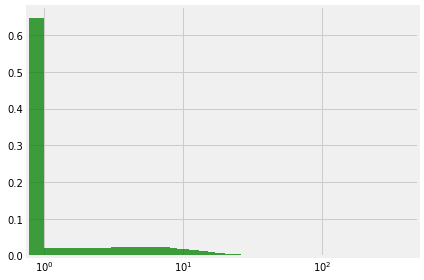

In [6]:
fig1, ax1 = plt.subplots()
ax1.hist(pd.Series(citation_df['citations'].dropna()), 363, density=True, facecolor='g', alpha=0.75)
ax1.set_xscale("log")
plt.tight_layout()
plt.show()

### What about a distribution of the number of articles published by authors?

In [25]:
query = """
MATCH (a:Author)
RETURN size((a)<-[:AUTHOR]-()) AS articlesPublished
"""

author_df = graph.run(query).to_data_frame()
author_df.describe([.25, .5, .75, .9, .99])

,articlesPublished
count,183910.000
mean,2.803
std,5.220
min,1.000
25%,1.000
50%,1.000
75%,2.000
90%,6.000
99%,25.000
max,176.000


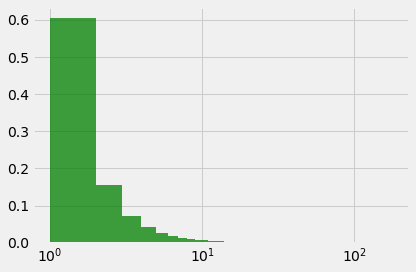

In [28]:
fig1, ax1 = plt.subplots()
ax1.hist(pd.Series(author_df['articlesPublished'].dropna()), 176, density=True, facecolor='g', alpha=0.75)
ax1.set_xscale("log")
plt.tight_layout()
plt.show()